In [1]:
import numpy as np
import pandas as ps
import matplotlib.pyplot as plt
import numpy as np
from harp_beam import compute_EEPs
import scipy.io

In [29]:
import numpy as np
from harp_beam import compute_EEPs
import scipy.io

## Q 2. plot all the 256 EEPs and their average (AEP)
num_dir = 2  # number of samples along theta
theta = np.array([0.0, np.pi/4.0])[:,None]  # angle from zenith in radians
phi = np.array([np.pi/2.0, 0.0])[:,None]   # azimuth from x-axis in radians (from 0 to 2pi)
# !! theta and phi must be vectors of the same size

# antenna positions loaded as follows
data_folder = 'harp_beam'
filename_eep = f"data_EEPs_SKALA41_random_100MHz.mat"
mat = scipy.io.loadmat(filename_eep)
pos_ant = np.array(mat['pos_ant'])
x_pos = pos_ant[:,0]
y_pos = pos_ant[:,1]

# the following function computes the theta and phi vector components of the 256 embedded element patterns
# evaluated at coordinates "theta" and "phi" defined earlier by the user
v_theta_polY, v_phi_polY, v_theta_polX, v_phi_polX = compute_EEPs(theta, phi)

# these voltage matrices are of size num_theta*num_phi x num_ant
# The EEP of antenna i_ant at position pos_ant(i_ant,:) is in v[:, i_ant]


In [61]:
num_dir = 256
theta = np.linspace(-np.pi/2, np.pi/2, num_dir)
phi = np.zeros_like(theta)

#EEPs
v_theta_polY, v_phi_polY, v_theta_polX, v_phi_polX = compute_EEPs(theta.copy()[:, None], phi.copy()[:, None])

# conver to dBV

def to_dBV(magnitude):
    return 20*np.log10(magnitude)

# Calculate magnitude of EEPs in dBV
magnitude_EEP_polY = to_dBV(np.abs(v_theta_polY))
magnitude_EEP_polX = to_dBV(np.abs(v_theta_polX))

# Calculate AEPs
AEP_polY = to_dBV(np.sqrt(np.mean(np.abs(v_theta_polY)**2, axis=1)))
AEP_polX = to_dBV(np.sqrt(np.mean(np.abs(v_theta_polX)**2, axis=1)))


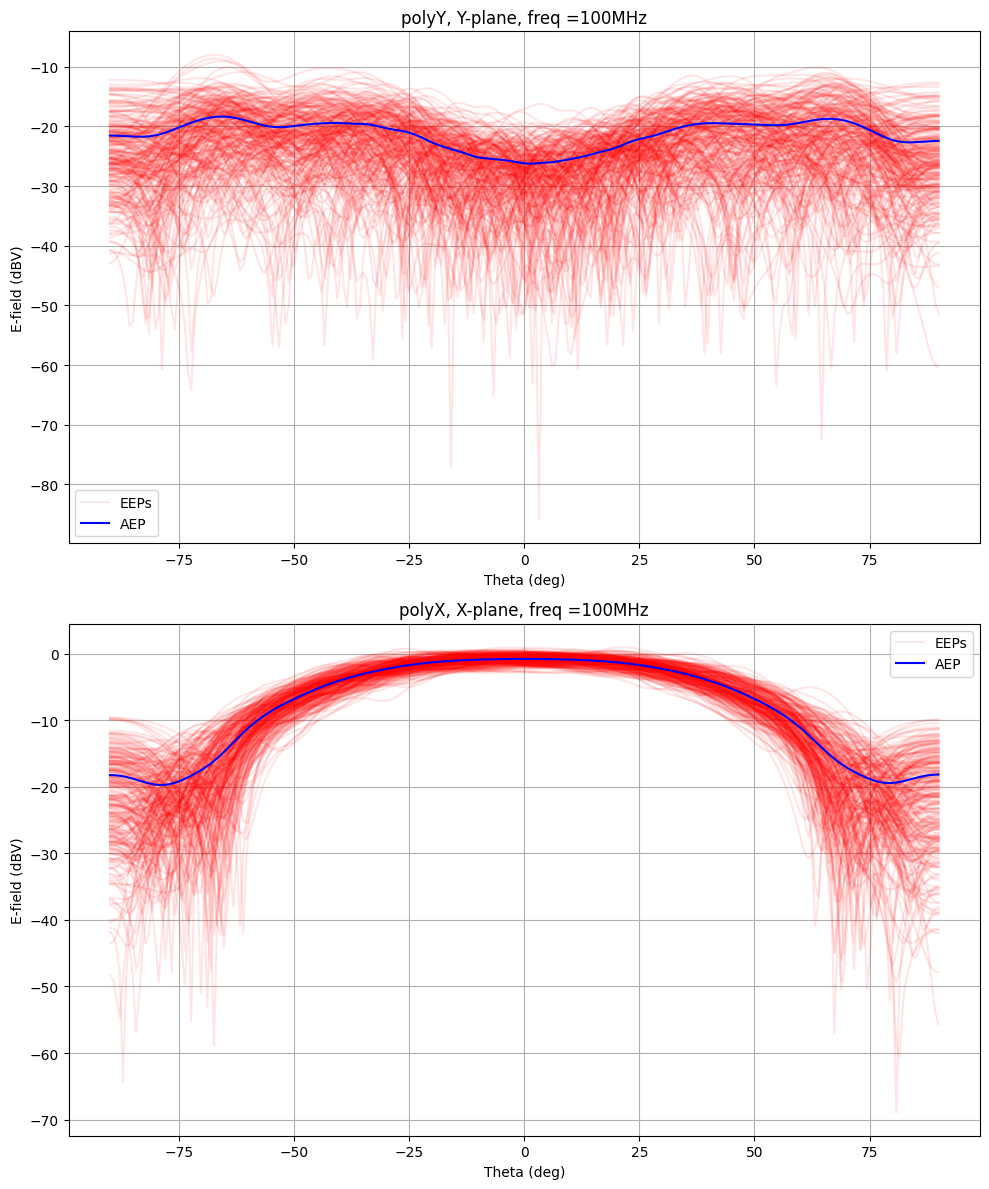

In [74]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
for i in range(v_theta_polY.shape[1]):
    if i == 0:
        # Label only the first EEP line for the legend
        plt.plot(theta * 180 / np.pi, magnitude_EEP_polY[:, i], 'r-', alpha=0.1, label='EEPs')
    else:
        # Plot the rest without a label
        plt.plot(theta * 180 / np.pi, magnitude_EEP_polY[:, i], 'r-', alpha=0.1) 
plt.plot(theta * 180 / np.pi, AEP_polY, 'b-', label='AEP') 
plt.title('polyY, Y-plane, freq =100MHz')
plt.xlabel('Theta (deg)')
plt.ylabel('E-field (dBV)')
plt.legend()
plt.grid(True)

# Plot EEPs for polX
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
for i in range(v_theta_polX.shape[1]):
    if i == 0:
        plt.plot(theta * 180 / np.pi, magnitude_EEP_polX[:, i], 'r-', alpha=0.1, label='EEPs')
    else:
        plt.plot(theta * 180 / np.pi, magnitude_EEP_polX[:, i], 'r-', alpha=0.1) 
plt.plot(theta * 180 / np.pi, AEP_polX, 'b-', label='AEP') 
plt.title('polyX, X-plane, freq =100MHz')
plt.xlabel('Theta (deg)')
plt.ylabel('E-field (dBV)')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout() 
plt.show()


In [40]:
# calculate the magnitude and phase of the EEPs
magnitude = []
phase = []
for i in range(len(v_theta_polY)):
    for j in range(len(v_theta_polY[i])):
         mag = np.abs(v_theta_polY[i][j])
         magnitude.append(mag)
         phas = np.angle(v_theta_polY[i][j]) * 180 / np.pi
         phase.append(phas)



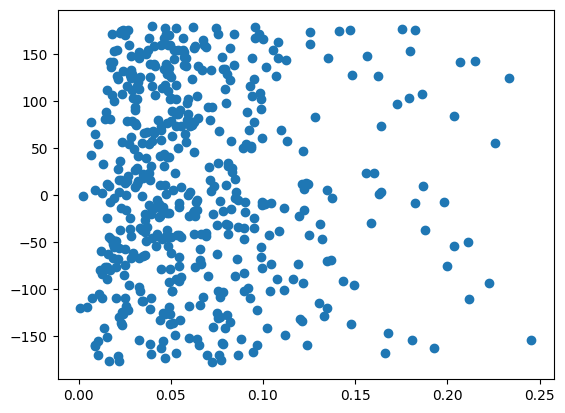

In [41]:
# plot the magnitude against phase
fig, ax = plt.subplots()
ax.scatter(magnitude, phase)

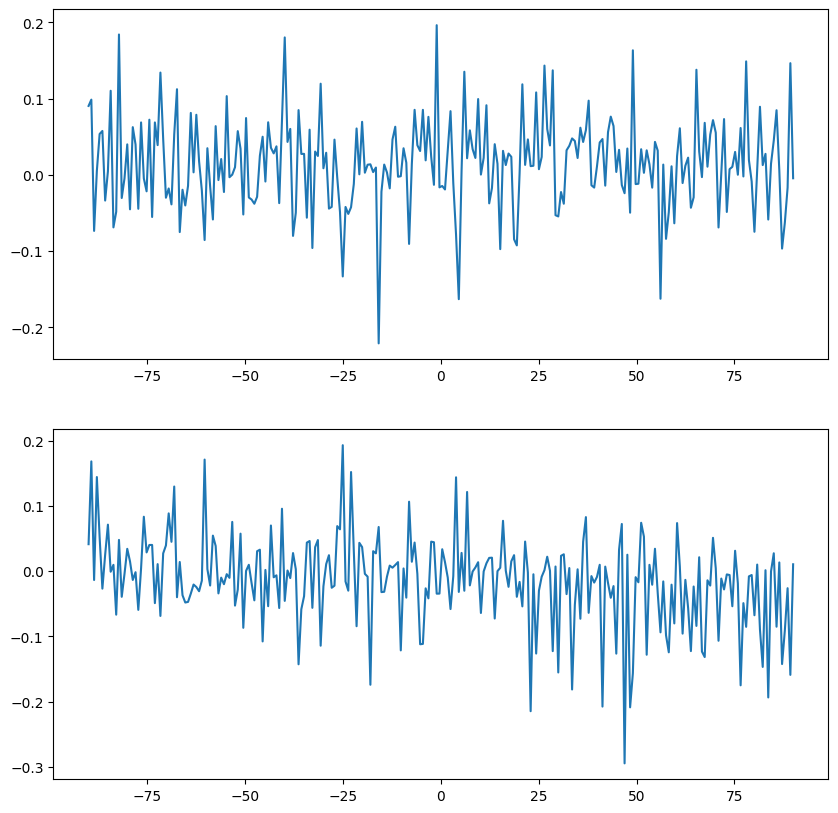

In [26]:
# plot polY and polX against theta (deg)
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(theta_deg, v_theta_polY[0])
ax[1].plot(theta_deg, v_theta_polX[0])